In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from common.preprocessor import load_data
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [17]:
# Load dataset
data = load_data('./data','Commodity Prices Monthly.csv')

In [18]:
data.head()

,Price
2002-01-01,19.96
2002-02-01,20.19
2002-03-01,24.03
2002-04-01,26.03
2002-05-01,25.69


In [21]:
# reset index of data
data = data.reset_index()
data.head()

,index,Price
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69


In [ ]:
data.columns = ['ds', 'y']

In [22]:
data.dtypes

index    datetime64[ns]
Price           float64
dtype: object

In [24]:
data.head()

,ds,y
0,2002-01-01,19.96
1,2002-02-01,20.19
2,2002-03-01,24.03
3,2002-04-01,26.03
4,2002-05-01,25.69


In [25]:
data.describe() # display the summary statistics of the data


,y
count,252.000000
mean,69.464722
std,28.030720
min,19.960000
25%,48.472500
50%,65.475000
75%,91.955000
max,134.790000


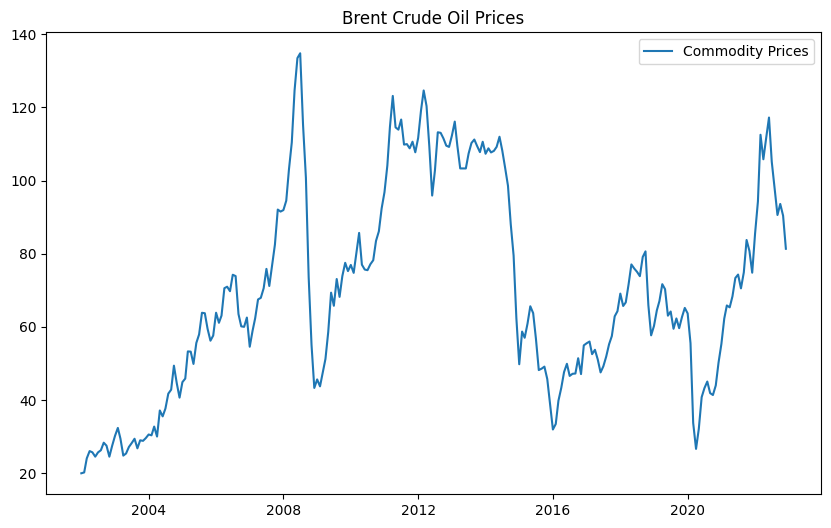

In [30]:
# plot the data
plt.figure(figsize=(10, 6))
plt.plot(data.ds, data.y, label='Commodity Prices')
plt.title('Brent Crude Oil Prices')
plt.legend()
plt.show()

In [31]:
# set the train and test data with start dates
train_start_date = '2002-01-01'
test_start_date = '2019-01-01'

In [33]:
model= Prophet(interval_width=0.95, seasonality_mode='additive')
model.fit(data[data['ds'] < test_start_date])

11:29:04 - cmdstanpy - INFO - Chain [1] start processing
11:29:05 - cmdstanpy - INFO - Chain [1] done processing
